## Wordcloud를 하기 위한 준비 단계

jdk 무료버전 설치
 자바 다운로드 링크 https://www.oracle.com/java/technologies/javase-downloads.html
 가입 후 jdk-8u202 버전 windows 또는 macOS 버전 받아 설치 
 내 pc 우측 마우스 클릭 --> 속성 --> 고급 시스템 설정 -->  환경 변수 --> 시스템 변수에서 새로 만들기 --> 
 변수 이름 : JAVA_HOME
 변수 값 : 자바 설치한 디렉션 복사하여 붙여 넣기 예) C:\Program Files\Java\jdk1.8.0_202\bin
 위의 값을 입력하고 모두 확인을 눌러서 나가기
 
jpype 설치
 아나콘다 프롬프트 관리자 권한으로 열어 pip install jpype1==1.1.2 또는 jpype1==0.7.0 설치

konlpy와 wordcloud 설치
 주피터 노트북에서 설치
 pip install konlpy,
 pip install wordcloud

simplejson과 pytagcloud 설치
 아나콘다 프롬프트에서 설치
 pip install simplejson,
 pip install pytagcloud,
 pip install pygame
///// 여기까지 됐으면 위에 것들도 잘 된 거라 볼 수 있다.

네이버에서 나눔고딕 다운을 받는다.

본인 컴퓨터에 설치된 pytagcloud폴더의 fonts 폴더로 NanumGothic.ttf 파일을 옮긴다.  
예) C:\Users\USER\Anaconda3\Lib\site-packages\pytagcloud\fonts

폴더 안에 있는 fonts.json 파일을 연결프로그램을 눌러 메모장으로 연다.
아래와 같이 name에 korean, ttf에 NanumGothic.ttf, web에 http://fonts.googleapis.com/earlyaccess/nanumgothic.css 를 적어 저장한다.
![나눔고딕](나눔고딕.jpg)

In [1]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


자바 다운로드 링크 https://www.oracle.com/java/technologies/javase-downloads.html

Jpype 다운로드 링크 https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype

In [247]:
from bs4 import BeautifulSoup 
import urllib.request 
from urllib.request import urlopen
from urllib.parse import quote
import pytagcloud
import re

from konlpy.tag import Okt
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Wordcloud 할 링크 2개
 1. 중앙일보 : 'https://news.joins.com/search/?keyword=' 중앙 안되는듯
 2. 동아닷컴 : 'https://www.donga.com/news/search?query=' 

In [248]:
#Okt()가 작동되면 정상 설치된 것
# 글자 형태소 분리기
nlp = Okt()

In [249]:
keyword = '백신'
print(quote(keyword))
# URL 뒤에 붙는 언어로 변경 시키기 위해 quote() 사용

%EB%B0%B1%EC%8B%A0


In [250]:
# URL 뒤에 검색어 추가
url =  'https://www.donga.com/news/search?query=' + quote(keyword)

In [251]:
urlopen(url)

In [252]:
html=urlopen(url)

In [253]:
soup = BeautifulSoup(html.read(), 'html5lib', from_encoding='utf8')
print(soup)

<!DOCTYPE html>
<html lang="ko"><head>
<title>동아닷컴</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="대한민국을 대표하는 정론지 동아일보의 디지털 창(窓)으로서 사회의 변화와 다양성을 아우르는 깊이있고 정확한 뉴스를 제공하고 있습니다." name="description"/>
<meta content="동아닷컴" name="writer"/>
<meta content="unsafe-url" name="referrer"/>
<meta content="dm86e6xoulnfokzid" name="dailymotion-domain-verification"/>
<meta content="nyedn3qpatz7zur9vbmms5epehnszw" name="facebook-domain-verification"/>
<link href="https://image.donga.com/donga2013/images/common/donga_icon.png" rel="image_src"/>
<link href="https://www.donga.com/news/search" rel="canonical"/>

<link href="https://image.donga.com/pc/2020/css/donga_sub.css?t=20210722" rel="stylesheet" type="text/css"/>

<link href="https://image.donga.com/donga/css.v.2.0/slick.css" rel="stylesheet" type="text/css"/>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':


In [254]:
#동아닷컴 크롤링
soup.findAll('a')

[<a href="#main_content">본문바로가기</a>,
 <a class="btn_close" href="#" onclick='javascript:$("#top_adzone").toggle(); return false;'><img src="https://image.donga.com/home2012/images/ad/btn_adclose.png"/></a>,
 <a class="icon_com btn_allmenu" href="#" onclick="javascript:return allmenuPopupObj.show();">전체메뉴보기</a>,
 <a href="https://www.donga.com/"><img alt="동아닷컴" src="https://image.donga.com/pc/2020/images/common/logo_donga01.png"/></a>,
 <a href="https://www.donga.com/news/Opinion">오피니언</a>,
 <a href="https://www.donga.com/news/Politics">정치</a>,
 <a href="https://www.donga.com/news/Economy">경제</a>,
 <a href="https://www.donga.com/news/Inter">국제</a>,
 <a href="https://www.donga.com/news/Society">사회</a>,
 <a href="https://www.donga.com/news/Culture">문화</a>,
 <a href="https://www.donga.com/news/Entertainment">연예</a>,
 <a href="https://www.donga.com/news/Sports">스포츠</a>,
 <a href="https://www.donga.com/news/Hotissue">핫이슈</a>,
 <a class="kakaotalk" href="#" onclick="javascript: sendLink2(); r

In [255]:
#동아닷컴 크롤링
soup.findAll('p', 'tit')

[<p class="tit">
                 <a href="https://www.donga.com/news/Issue/031407" target="_blank">독감<span class="highlight">백신</span> 포비아 전국 확산</a>
                 <em>[이슈]</em>
                 <span>2020-10-21 00:00</span>
             </p>,
 <p class="tit">
                 <a href="https://www.donga.com/news/article/all/20210914/109252471/1" target="_blank">“<span class="highlight">백신</span> 자체는 이상반응 유발 안해…사람마다 다른 이상반응 발생”</a>
                 <em></em>
                 <span>2021-09-14 15:38</span>
             </p>,
 <p class="tit">
                 <a href="https://www.donga.com/news/article/all/20210914/109251514/1" target="_blank">바이든, 22일 <span class="highlight">백신</span> 정상회의…“1년뒤 전세계 접종률 70% 달성”</a>
                 <em></em>
                 <span>2021-09-14 15:04</span>
             </p>,
 <p class="tit">
                 <a href="https://www.donga.com/news/article/all/20210914/109250473/1" target="_blank">뉴욕시, 18개월만에 정상수업…첫날부터 학교서 확진자 쏟아져</a>
                 <em></em

In [256]:
i = 2
soup.findAll('p', 'tit')[i]

<p class="tit">
                <a href="https://www.donga.com/news/article/all/20210914/109251514/1" target="_blank">바이든, 22일 <span class="highlight">백신</span> 정상회의…“1년뒤 전세계 접종률 70% 달성”</a>
                <em></em>
                <span>2021-09-14 15:04</span>
            </p>

In [257]:
soup.findAll('p', 'tit')[i].select('a')

[<a href="https://www.donga.com/news/article/all/20210914/109251514/1" target="_blank">바이든, 22일 <span class="highlight">백신</span> 정상회의…“1년뒤 전세계 접종률 70% 달성”</a>]

In [258]:
soup.findAll('p', 'tit')[i].select('a')[0]

<a href="https://www.donga.com/news/article/all/20210914/109251514/1" target="_blank">바이든, 22일 <span class="highlight">백신</span> 정상회의…“1년뒤 전세계 접종률 70% 달성”</a>

In [259]:
link = soup.findAll('p', 'tit')[i].select('a')[0]['href']
link

'https://www.donga.com/news/article/all/20210914/109251514/1'

In [260]:
html2 = urlopen(link)
html

In [261]:
soup2 = BeautifulSoup(html2.read(), 'html5lib', from_encoding='utf8')
print(soup2)

<!DOCTYPE html>
<html lang="ko"><head>
<title>바이든, 22일 백신 정상회의…“1년뒤 전세계 접종률 70% 달성”</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="조 바이든 미국 대통령이 이달 22일 전 세계 주요국 리더들과 함께 신종 코로나바이러스 감염증(코로나19) 대응을 위한 정상회담을 열고 ‘내년 9월까지 글로벌 백신 접종률 70%…" name="description"/>
<meta content="동아닷컴" name="writer"/>
<meta content="unsafe-url" name="referrer"/>

<meta content="nyedn3qpatz7zur9vbmms5epehnszw" name="facebook-domain-verification"/>
<link href="https://dimg.donga.com/wps/NEWS/IMAGE/2021/09/14/109221135.2.jpg" rel="image_src"/>
<link href="https://www.donga.com/news/Inter/article/all/20210914/109251514/1" rel="canonical"/>
<link href="https://www.donga.com/news/amp/all/20210914/109251514/1" rel="amphtml"/>

<meta content="바이든, 22일 백신 정상회의…“1년뒤 전세계 접종률 70% 달성”" property="og:title"/>
<meta content="https://dimg.donga.com/a/600/0/90/5/wps/NEWS/IMAGE/2021/09/14/109221135.2.jpg" property="og:image"/>
<meta c

In [262]:
contents= soup2.select('div.article_txt')
contents

[<div class="article_txt" itemprop="articleBody">
             
             <div class="articlePhotoC"><span class="thumb" style="width:640px"><img alt="" src="https://dimg.donga.com/wps/NEWS/IMAGE/2021/09/14/109221135.2.jpg"/></span></div><div class="txt_ban"><script src="https://image.donga.com/dac/NEWS/PC/news_view_photo_under_01.js" type="text/javascript"></script></div>조 바이든 미국 대통령이 이달 22일 전 세계 주요국 리더들과 함께 신종 코로나바이러스 감염증(코로나19) 대응을 위한 정상회담을 열고 ‘내년 9월까지 글로벌 백신 접종률 70%’ 달성 등의 목표를 제시할 것으로 알려졌다.<br/><br/> 워싱턴포스트(WP)는 13일(현지 시간) 자체 입수한 문서를 토대로 백악관이 20~27일 열리는 유엔총회 기간에 ‘세계 코로나19 정상회의 : 팬데믹 종식과 더 나은 재건’이라고 이름 붙인 화상 정상회의를 추진 중이라며 이렇게 보도했다. 회의에는 각국 정상은 물론 국제기구 수장, 기업인, 자선 활동가, 비정부 기구 대표 등이 초청됐다. 구체적으로 어느 나라가 초청 대상인지는 아직 공개되지 않았다.<br/><br/> 초안에 따르면 미국은 다음 유엔 총회가 열리는 내년 9월까지 세계 인구 중 최소한 70%에 백신 접종 완료 및 중장기에 걸친 백신 제조 등을 양대 목표로 설정했다. 역량을 갖춘 국가들에는 10억 도스 분량의 추가 백신을 구매 혹은 기부함으로써 국가 간 백신 격차를 줄여나가는 데 동참할 것을 요청하고 있다. 이밖에도 산소와 검사 키트, 치료를 위한 약품 제공과 이를 위한 자금 지원 요청도 담겨있다.<br/><br/><div class="armerica

In [263]:
contents[0].findAll(text=True) #불필요한 태그 등 제거

['\n            \n            ',
 '조 바이든 미국 대통령이 이달 22일 전 세계 주요국 리더들과 함께 신종 코로나바이러스 감염증(코로나19) 대응을 위한 정상회담을 열고 ‘내년 9월까지 글로벌 백신 접종률 70%’ 달성 등의 목표를 제시할 것으로 알려졌다.',
 ' 워싱턴포스트(WP)는 13일(현지 시간) 자체 입수한 문서를 토대로 백악관이 20~27일 열리는 유엔총회 기간에 ‘세계 코로나19 정상회의 : 팬데믹 종식과 더 나은 재건’이라고 이름 붙인 화상 정상회의를 추진 중이라며 이렇게 보도했다. 회의에는 각국 정상은 물론 국제기구 수장, 기업인, 자선 활동가, 비정부 기구 대표 등이 초청됐다. 구체적으로 어느 나라가 초청 대상인지는 아직 공개되지 않았다.',
 ' 초안에 따르면 미국은 다음 유엔 총회가 열리는 내년 9월까지 세계 인구 중 최소한 70%에 백신 접종 완료 및 중장기에 걸친 백신 제조 등을 양대 목표로 설정했다. 역량을 갖춘 국가들에는 10억 도스 분량의 추가 백신을 구매 혹은 기부함으로써 국가 간 백신 격차를 줄여나가는 데 동참할 것을 요청하고 있다. 이밖에도 산소와 검사 키트, 치료를 위한 약품 제공과 이를 위한 자금 지원 요청도 담겨있다.',
 '\n        ',
 ' ADMARU Donga_DT_NEWS_CV_Video ',
 '\n        ',
 ' ',
 ' 미국은 이 정상회의에 대해 “참가자들은 이들 목표를 달성하고, 세계가 향후 보건 위협에 대응하는 데 필요한 야심 찬 기획과 확고한 행동을 제시하게 된다”고 설명했다. 회의 참가자들은 올 가을 코로나19 대응 계획 및 비전과 함께 “2022년 코로나19의 종식 및 또 다른 팬데믹을 막기 위한 글로벌 보건 개선 구축에 전념하겠다”는 내용을 담은 90~120초 분량의 영상도 촬영해 제출하게 된다.',
 '\n    ',
 '주요기사',
 '\n    ',
 '\n        ',
 '‘백기’든 카카오…택시 유료호출 없애고 꽃·간식 배달 철수',

In [264]:
data = str(contents[0].findAll(text=True))
data

'[\'\\n            \\n            \', \'조 바이든 미국 대통령이 이달 22일 전 세계 주요국 리더들과 함께 신종 코로나바이러스 감염증(코로나19) 대응을 위한 정상회담을 열고 ‘내년 9월까지 글로벌 백신 접종률 70%’ 달성 등의 목표를 제시할 것으로 알려졌다.\', \' 워싱턴포스트(WP)는 13일(현지 시간) 자체 입수한 문서를 토대로 백악관이 20~27일 열리는 유엔총회 기간에 ‘세계 코로나19 정상회의 : 팬데믹 종식과 더 나은 재건’이라고 이름 붙인 화상 정상회의를 추진 중이라며 이렇게 보도했다. 회의에는 각국 정상은 물론 국제기구 수장, 기업인, 자선 활동가, 비정부 기구 대표 등이 초청됐다. 구체적으로 어느 나라가 초청 대상인지는 아직 공개되지 않았다.\', \' 초안에 따르면 미국은 다음 유엔 총회가 열리는 내년 9월까지 세계 인구 중 최소한 70%에 백신 접종 완료 및 중장기에 걸친 백신 제조 등을 양대 목표로 설정했다. 역량을 갖춘 국가들에는 10억 도스 분량의 추가 백신을 구매 혹은 기부함으로써 국가 간 백신 격차를 줄여나가는 데 동참할 것을 요청하고 있다. 이밖에도 산소와 검사 키트, 치료를 위한 약품 제공과 이를 위한 자금 지원 요청도 담겨있다.\', \'\\n        \', \' ADMARU Donga_DT_NEWS_CV_Video \', \'\\n        \', \' \', \' 미국은 이 정상회의에 대해 “참가자들은 이들 목표를 달성하고, 세계가 향후 보건 위협에 대응하는 데 필요한 야심 찬 기획과 확고한 행동을 제시하게 된다”고 설명했다. 회의 참가자들은 올 가을 코로나19 대응 계획 및 비전과 함께 “2022년 코로나19의 종식 및 또 다른 팬데믹을 막기 위한 글로벌 보건 개선 구축에 전념하겠다”는 내용을 담은 90~120초 분량의 영상도 촬영해 제출하게 된다.\', \'\\n    \', \'주요기사\', \'\\n    \', \'\\n        \', \'‘백기’든 카카오…택시

In [265]:
raw = ""
raw = raw + data
raw

'[\'\\n            \\n            \', \'조 바이든 미국 대통령이 이달 22일 전 세계 주요국 리더들과 함께 신종 코로나바이러스 감염증(코로나19) 대응을 위한 정상회담을 열고 ‘내년 9월까지 글로벌 백신 접종률 70%’ 달성 등의 목표를 제시할 것으로 알려졌다.\', \' 워싱턴포스트(WP)는 13일(현지 시간) 자체 입수한 문서를 토대로 백악관이 20~27일 열리는 유엔총회 기간에 ‘세계 코로나19 정상회의 : 팬데믹 종식과 더 나은 재건’이라고 이름 붙인 화상 정상회의를 추진 중이라며 이렇게 보도했다. 회의에는 각국 정상은 물론 국제기구 수장, 기업인, 자선 활동가, 비정부 기구 대표 등이 초청됐다. 구체적으로 어느 나라가 초청 대상인지는 아직 공개되지 않았다.\', \' 초안에 따르면 미국은 다음 유엔 총회가 열리는 내년 9월까지 세계 인구 중 최소한 70%에 백신 접종 완료 및 중장기에 걸친 백신 제조 등을 양대 목표로 설정했다. 역량을 갖춘 국가들에는 10억 도스 분량의 추가 백신을 구매 혹은 기부함으로써 국가 간 백신 격차를 줄여나가는 데 동참할 것을 요청하고 있다. 이밖에도 산소와 검사 키트, 치료를 위한 약품 제공과 이를 위한 자금 지원 요청도 담겨있다.\', \'\\n        \', \' ADMARU Donga_DT_NEWS_CV_Video \', \'\\n        \', \' \', \' 미국은 이 정상회의에 대해 “참가자들은 이들 목표를 달성하고, 세계가 향후 보건 위협에 대응하는 데 필요한 야심 찬 기획과 확고한 행동을 제시하게 된다”고 설명했다. 회의 참가자들은 올 가을 코로나19 대응 계획 및 비전과 함께 “2022년 코로나19의 종식 및 또 다른 팬데믹을 막기 위한 글로벌 보건 개선 구축에 전념하겠다”는 내용을 담은 90~120초 분량의 영상도 촬영해 제출하게 된다.\', \'\\n    \', \'주요기사\', \'\\n    \', \'\\n        \', \'‘백기’든 카카오…택시

raw = []
raw.append(a)

In [351]:
# 동아닷컴
raw = ""

for title in soup.findAll('p', 'tit'):
    title_link = title.select('a')
    article_url = title_link[0]['href']
    try:
        html2 = urlopen(article_url)
        soup2 = BeautifulSoup(html2.read(), 'html5lib', from_encoding='utf-8')
        contents = soup2.select('div.article_txt')
        for i in contents:
            data = str(i.findAll(text=True))
            raw = raw + data
    except Exception as e:
        pass
print(raw)

['\n            \n            ', '코로나19 백신이 이상반응을 유발하는 게 아니라 사람마다 다른 이상반응이 발생할 수 있다는 전문가의 의견이 나왔다.', '강동윤 서울대병원 약물안전센터 교수는 14일 오후 질병관리청에서 열린 백신 이상반응 전문가 설명회에서 “백신 자체가 중증 이상반응을 유발하는 것이 아니라 이상반응이 생기는 인자는 본인에게 있는 것”이라고 말했다.', '강 교수에 따르면 약물 이상반응 종류는 ▲예측 가능한 이상반응 ▲예측할 수 없는 이상반응 등 두 가지로 나뉜다.', '\n        ', ' ADMARU Donga_DT_NEWS_CV_Video ', '\n        ', ' ', '이상반응의 70~80%를 차지하는 예측 가능한 이상반응은 약물을 접한 후 나타날 수 있다고 알려진 반응을 말한다. 백신 접종 후 나타나는 발열, 복통, 오한, 근육통 등 일반적으로 발생하는 이상반응으로, 이미 발생 기전이 설명된 경우다.', '\n    ', '주요기사', '\n    ', '\n        ', '‘백기’든 카카오…택시 유료호출 없애고 꽃·간식 배달 철수', '박지원-조성은 ‘동석자’ 지목 洪캠프 인사 “朴원장-조씨 모른다”', '\n    ', '\n    \n', '반면 나머지 20~30%가량은 특정 인자를 가진 사람에게서 나타날 수 있는 두드러기, 알레르기 반응 등 면역학적 이상반응을 말한다. 치명적 이상반응인 아나필락시스, 길랑-바레 증후군, 혈소판 감소성 혈전증 등이 해당한다.', '일각에선 백신 구성물질 중 화장품, 치약, 항암제 등에 많이 쓰이는 폴리에틸렌글리콜(PEG), 식품 첨가제 등으로 쓰이는 폴리소베이트 80(PS 80) 등이 알레르기 등을 유발한다는 주장이 이어지고 있다.', '그러나 강 교수는 “백신이 인체에 들어가서 악한 작용을 하면서 해를 끼치는 게 아니다”라며 “치명적인 이상반응은 백신 접종 의도와 무관하게 분자구조상으로 면역계에서 적으로 오인해 발생하는 현상”이라고 설명했다.', '

In [352]:
#단어 형태소 분석 Okt()가 형태소 분석기
nlp = Okt() 
nouns = nlp.nouns(raw)
nouns

['코로나',
 '백신',
 '이상',
 '반응',
 '유발',
 '게',
 '사람',
 '다른',
 '이상',
 '반응',
 '발생',
 '수',
 '전문가',
 '의견',
 '강동윤',
 '서울대',
 '병원',
 '약물',
 '안전',
 '센터',
 '교수',
 '오후',
 '질병',
 '관리',
 '청',
 '백신',
 '이상',
 '반응',
 '전문가',
 '설명',
 '회',
 '백신',
 '자체',
 '중증',
 '이상',
 '반응',
 '유발',
 '것',
 '이상',
 '반응',
 '인자',
 '본인',
 '것',
 '말',
 '강',
 '교수',
 '약물',
 '이상',
 '반응',
 '종류',
 '예측',
 '이상',
 '반응',
 '예측',
 '수',
 '이상',
 '반응',
 '등',
 '두',
 '가지',
 '이상',
 '반응',
 '를',
 '차지',
 '예측',
 '이상',
 '반응',
 '약물',
 '접',
 '후',
 '수',
 '반응',
 '말',
 '백신',
 '접종',
 '후',
 '발열',
 '복통',
 '오한',
 '근육통',
 '등',
 '일반',
 '발생',
 '이상',
 '반응',
 '발생',
 '기전',
 '설명',
 '경우',
 '기사',
 '백기',
 '카카오',
 '택시',
 '유료',
 '호출',
 '꽃',
 '간식',
 '배달',
 '철수',
 '박지원',
 '조성은',
 '동석',
 '지목',
 '캠프',
 '인사',
 '원장',
 '조씨',
 '반면',
 '나머지',
 '가량',
 '특정',
 '인자',
 '사람',
 '수',
 '두드러기',
 '알레르기',
 '반응',
 '등',
 '면역학',
 '이상',
 '반응',
 '말',
 '치명',
 '이상',
 '반응',
 '아나필락시스',
 '길',
 '바레',
 '증후군',
 '혈소판',
 '감소',
 '혈전',
 '증',
 '등',
 '해당',
 '일각',
 '백신',
 '구성',
 '물질',
 '중',
 '화장품',
 '치약',
 '항암제',
 '

In [353]:
nouns[0]

'코로나'

In [354]:
len(nouns[0])

3

In [355]:
#2자 이상만 추출
result = []
for temp in nouns:
    if len(temp) > 1:
        result.append(temp)
result

['코로나',
 '백신',
 '이상',
 '반응',
 '유발',
 '사람',
 '다른',
 '이상',
 '반응',
 '발생',
 '전문가',
 '의견',
 '강동윤',
 '서울대',
 '병원',
 '약물',
 '안전',
 '센터',
 '교수',
 '오후',
 '질병',
 '관리',
 '백신',
 '이상',
 '반응',
 '전문가',
 '설명',
 '백신',
 '자체',
 '중증',
 '이상',
 '반응',
 '유발',
 '이상',
 '반응',
 '인자',
 '본인',
 '교수',
 '약물',
 '이상',
 '반응',
 '종류',
 '예측',
 '이상',
 '반응',
 '예측',
 '이상',
 '반응',
 '가지',
 '이상',
 '반응',
 '차지',
 '예측',
 '이상',
 '반응',
 '약물',
 '반응',
 '백신',
 '접종',
 '발열',
 '복통',
 '오한',
 '근육통',
 '일반',
 '발생',
 '이상',
 '반응',
 '발생',
 '기전',
 '설명',
 '경우',
 '기사',
 '백기',
 '카카오',
 '택시',
 '유료',
 '호출',
 '간식',
 '배달',
 '철수',
 '박지원',
 '조성은',
 '동석',
 '지목',
 '캠프',
 '인사',
 '원장',
 '조씨',
 '반면',
 '나머지',
 '가량',
 '특정',
 '인자',
 '사람',
 '두드러기',
 '알레르기',
 '반응',
 '면역학',
 '이상',
 '반응',
 '치명',
 '이상',
 '반응',
 '아나필락시스',
 '바레',
 '증후군',
 '혈소판',
 '감소',
 '혈전',
 '해당',
 '일각',
 '백신',
 '구성',
 '물질',
 '화장품',
 '치약',
 '항암제',
 '폴리',
 '에틸렌글리콜',
 '식품',
 '첨가제',
 '폴리',
 '베이트',
 '알레르기',
 '유발',
 '주장',
 '교수',
 '백신',
 '인체',
 '악한',
 '작용',
 '라며',
 '치명',
 '이상',
 '반응',
 '백신',
 '접종',
 '의도',
 '무

In [356]:
# 각 단어가 몇번 나왔는지 확인
count = Counter(result)
count

Counter({'코로나': 37,
         '백신': 70,
         '이상': 24,
         '반응': 22,
         '유발': 6,
         '사람': 5,
         '다른': 6,
         '발생': 10,
         '전문가': 3,
         '의견': 3,
         '강동윤': 1,
         '서울대': 1,
         '병원': 6,
         '약물': 3,
         '안전': 7,
         '센터': 2,
         '교수': 4,
         '오후': 4,
         '질병': 4,
         '관리': 2,
         '설명': 8,
         '자체': 3,
         '중증': 2,
         '인자': 2,
         '본인': 1,
         '종류': 1,
         '예측': 3,
         '가지': 3,
         '차지': 3,
         '접종': 73,
         '발열': 2,
         '복통': 2,
         '오한': 1,
         '근육통': 1,
         '일반': 2,
         '기전': 1,
         '경우': 10,
         '기사': 15,
         '백기': 5,
         '카카오': 5,
         '택시': 5,
         '유료': 5,
         '호출': 5,
         '간식': 5,
         '배달': 5,
         '철수': 6,
         '박지원': 10,
         '조성은': 15,
         '동석': 5,
         '지목': 5,
         '캠프': 10,
         '인사': 7,
         '원장': 5,
         '조씨': 5,
         

In [357]:
tag = count.most_common(50)
tag

[('접종', 73),
 ('백신', 70),
 ('코로나', 37),
 ('여행', 34),
 ('이상', 24),
 ('반응', 22),
 ('배송', 19),
 ('국가', 18),
 ('지원', 17),
 ('기자', 16),
 ('기사', 15),
 ('조성은', 15),
 ('개월', 15),
 ('확인', 15),
 ('격리', 15),
 ('정부', 14),
 ('정상', 14),
 ('검사', 14),
 ('입국', 14),
 ('마켓', 14),
 ('감소', 13),
 ('관광', 13),
 ('추천', 12),
 ('수업', 12),
 ('청원', 12),
 ('업체', 12),
 ('서비스', 12),
 ('페스티벌', 12),
 ('완료', 11),
 ('해외여행', 11),
 ('지난해', 11),
 ('증가', 11),
 ('발생', 10),
 ('경우', 10),
 ('박지원', 10),
 ('캠프', 10),
 ('식품', 10),
 ('서울', 10),
 ('지난', 10),
 ('뉴스', 9),
 ('뉴욕시', 9),
 ('당국', 9),
 ('방역', 9),
 ('자가', 9),
 ('새벽', 9),
 ('컬리', 9),
 ('상품', 9),
 ('고용', 9),
 ('한국', 9),
 ('설명', 8)]

In [358]:
taglist = pytagcloud.make_tags(tag, maxsize = 100)

In [359]:
# 워드 클라우드 이미지 생성
pytagcloud.create_tag_image(taglist, "word_donga.png", size=(1000,600),
                            fontname="korean", rectangular=False)

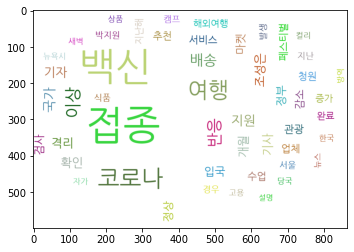

In [360]:
img = mpimg.imread("word_donga.png")
plt.imshow(img)
plt.show()

In [350]:
nlp = Okt()
nouns = nlp.nouns(raw)

result = []
for temp in nouns:
    if len(temp) > 1:
        result.append(temp)
        
count = Counter(result)
tag = count.most_common(50)
taglist = pytagcloud.make_tags(tag, maxsize = 100)

pytagcloud.create_tag_image(taglist, "word_donga.png", size =(1000,600), 
                            fontname="korean", rectangular=False)

In [121]:
#연합뉴스: 'https://www.yna.co.kr/search/index?query='
#ytn: 'https://www.ytn.co.kr/search/?q'
keyword0 = '두통'
print(quote(keyword0))

%EB%91%90%ED%86%B5


In [122]:
url2 = 'https://www.ytn.co.kr/search/?q' + quote(keyword0)

In [123]:
urlopen(url2)

In [124]:
html0 = urlopen(url2)
#html에 저장

In [125]:
soup0 = BeautifulSoup(html0.read(), 'html5lib', from_encoding='utf8')
print(soup0)
#html에 저장한 것을 BeautifulSoup를 이용한 후 출력
#페이지를 구성하는 html을 긁어옴

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="ko" xml:lang="ko" xmlns="http://www.w3.org/1999/xhtml"><head>
<title>[검색 목록]YTN 뉴스 :: 검색</title>
<link href="/img/comm/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/img/comm/favicon.ico" rel="icon" type="image/x-icon"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="824969a675a69732787fac7267be435e7d7eaacd" name="naver-site-verification"/>
<meta content="YTN" property="og:site_name"/>
<meta content="237776059583039" property="fb:pages"/>
<meta content="[검색 목록]YTN 뉴스 :: 검색" name="title"/>
<meta content="대한민국 24시간 뉴스 방송채널, 실시간 속보 및 제보하기, 분야별 뉴스, 방송 프로그램 다시보기" name="d

In [137]:
# 크롤링 원하는 것 추출 /// 셀레늄? 을 사용하면 실시간으로 가능
soup0.findAll('a')

[<a class="btn_menu" href="javascript:void(0);" onclick="$('#hammenu, #menu_black').show();"><span class="blind">메뉴</span></a>,
 <a href="https://www.ytn.co.kr">HOME</a>,
 <a href="https://www.ytn.co.kr/info/webpush.php">뉴스알림</a>,
 <a href="https://www.ytn.co.kr/_hd/hd_live.html">라이브</a>,
 <a href="https://www.ytn.co.kr/hd/hd_live.php?sort=1 ">편성표</a>,
 <a href="https://mj.ytn.co.kr">제보</a>,
 <a href="https://www.ytn.co.kr/member2/login.php?r_url=" id="loginChk3">로그인·회원가입</a>,
 <a href="javascript:void(0);">분야별뉴스</a>,
 <a href="javascript:void(0);">와플뉴스</a>,
 <a href="javascript:void(0);">YTN star</a>,
 <a href="javascript:void(0);">다시보기</a>,
 <a href="javascript:void(0);">제보</a>,
 <a href="javascript:void(0);">시청자센터</a>,
 <a href="javascript:void(0);">알립니다</a>,
 <a href="javascript:void(0);">특집 프로젝트</a>,
 <a href="javascript:void(0);">광고·비즈니스</a>,
 <a href="javascript:void(0);">디지털 서비스</a>,
 <a href="https://www.ytn.co.kr/news/main_news.html">분야별 뉴스 메인</a>,
 <a href="https://www.ytn.c

In [138]:
i = 2
soup0.findAll('a')[i]

<a href="https://www.ytn.co.kr/info/webpush.php">뉴스알림</a>

In [128]:
soup0.findAll('div')[i].select('a') # div 내부의 a만 나옴

[<a href="javascript:void(0);">분야별뉴스</a>,
 <a href="javascript:void(0);">와플뉴스</a>,
 <a href="javascript:void(0);">YTN star</a>,
 <a href="javascript:void(0);">다시보기</a>,
 <a href="javascript:void(0);">제보</a>,
 <a href="javascript:void(0);">시청자센터</a>,
 <a href="javascript:void(0);">알립니다</a>,
 <a href="javascript:void(0);">특집 프로젝트</a>,
 <a href="javascript:void(0);">광고·비즈니스</a>,
 <a href="javascript:void(0);">디지털 서비스</a>]

In [140]:
data0 = str(soup0.findAll(text=True))
data0

'[\'html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"\', \'\\n\', \'[검색 목록]YTN 뉴스 :: 검색\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \' Facebook Open Graph\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \' Twitter \', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \' 카카오톡 공유 \', \'\\n\', "_L(\'search\',\'L\',\'\',\'\');", \'\\n\', \' 웹푸시 \', \'\\n\', \'\\n\', \'\\n\', \'\\n\', \'\\n$(document).ready(function(){\\n\\t//스크롤시 GNB처리\\n\\tif($.cookie("scroll") !== null) window.scrollTo(0, $(window).scrollTop($.cookie("scroll")));\\n\\t\\n\\t$(window).scroll( function() {\\n\\t\\tif($(window).scrollTop()>=20) {\\t//심플 GNB\\n\\t\\t\\t$(".header").addClass("scroll");\\n\\t\\t\\t$(\\\'.box_login\\\').hide();\\t\\t//로그인\\n\\t\\t\\t$(\\\'.b

In [141]:
nlp0 = Okt() 
nouns0 = nlp.nouns(data0)
nouns0

['검색',
 '목록',
 '뉴스',
 '검색',
 '카카오',
 '톡',
 '공유',
 '웹',
 '푸시',
 '스',
 '크롤',
 '시',
 '처리',
 '심플',
 '로그인',
 '검색',
 '기본',
 '새로고침',
 '시',
 '스',
 '크롤',
 '위치',
 '저장',
 '햄버거',
 '메뉴',
 '클릭',
 '라이브',
 '실시간',
 '인기',
 '라이브',
 '실시간',
 '인기',
 '검색',
 '점검',
 '여부',
 '확인',
 '안정',
 '서비스',
 '제공',
 '위',
 '서버',
 '점검',
 '진행',
 '예정',
 '아래',
 '작업',
 '시간',
 '동안',
 '검색',
 '서비스',
 '제한',
 '이용자',
 '여러분',
 '양해',
 '작업시간',
 '스크립트',
 '시작',
 '문의',
 '스크립트',
 '종료',
 '문의',
 '메뉴',
 '햄버거',
 '메뉴',
 '공통',
 '메뉴',
 '뉴스',
 '알림',
 '라이브',
 '편성표',
 '제보',
 '로그인',
 '회원',
 '가입',
 '검색',
 '분야',
 '뉴스',
 '와플',
 '뉴스',
 '다시',
 '보기',
 '제보',
 '시청자',
 '센터',
 '특집',
 '프로젝트',
 '광고',
 '비즈니스',
 '디지털',
 '서비스',
 '분야',
 '뉴스',
 '분야',
 '별',
 '뉴스',
 '메인',
 '최신',
 '뉴스',
 '뉴스',
 '속보',
 '알림',
 '단독',
 '정치',
 '경제',
 '사회',
 '전국',
 '국제',
 '과학',
 '문화',
 '스포츠',
 '데이터',
 '저널리즘',
 '날씨',
 '재난',
 '정보',
 '광장',
 '와플',
 '뉴스',
 '와플',
 '뉴스',
 '메인',
 '모두',
 '자막',
 '뉴스',
 '최신',
 '뉴스',
 '별책',
 '부록',
 '요맨',
 '세상',
 '시사',
 '캐리커쳐',
 '제보',
 '영상',
 '개미',
 '일기',
 '여행',
 '제보',
 '거',


In [143]:
result0 = []
for temp in nouns0:
    if len(temp) > 1:
        result0.append(temp)
result0

['검색',
 '목록',
 '뉴스',
 '검색',
 '카카오',
 '공유',
 '푸시',
 '크롤',
 '처리',
 '심플',
 '로그인',
 '검색',
 '기본',
 '새로고침',
 '크롤',
 '위치',
 '저장',
 '햄버거',
 '메뉴',
 '클릭',
 '라이브',
 '실시간',
 '인기',
 '라이브',
 '실시간',
 '인기',
 '검색',
 '점검',
 '여부',
 '확인',
 '안정',
 '서비스',
 '제공',
 '서버',
 '점검',
 '진행',
 '예정',
 '아래',
 '작업',
 '시간',
 '동안',
 '검색',
 '서비스',
 '제한',
 '이용자',
 '여러분',
 '양해',
 '작업시간',
 '스크립트',
 '시작',
 '문의',
 '스크립트',
 '종료',
 '문의',
 '메뉴',
 '햄버거',
 '메뉴',
 '공통',
 '메뉴',
 '뉴스',
 '알림',
 '라이브',
 '편성표',
 '제보',
 '로그인',
 '회원',
 '가입',
 '검색',
 '분야',
 '뉴스',
 '와플',
 '뉴스',
 '다시',
 '보기',
 '제보',
 '시청자',
 '센터',
 '특집',
 '프로젝트',
 '광고',
 '비즈니스',
 '디지털',
 '서비스',
 '분야',
 '뉴스',
 '분야',
 '뉴스',
 '메인',
 '최신',
 '뉴스',
 '뉴스',
 '속보',
 '알림',
 '단독',
 '정치',
 '경제',
 '사회',
 '전국',
 '국제',
 '과학',
 '문화',
 '스포츠',
 '데이터',
 '저널리즘',
 '날씨',
 '재난',
 '정보',
 '광장',
 '와플',
 '뉴스',
 '와플',
 '뉴스',
 '메인',
 '모두',
 '자막',
 '뉴스',
 '최신',
 '뉴스',
 '별책',
 '부록',
 '요맨',
 '세상',
 '시사',
 '캐리커쳐',
 '제보',
 '영상',
 '개미',
 '일기',
 '여행',
 '제보',
 '실화',
 '건축',
 '디자인',
 '패션',
 '뷰티',
 '구루',
 '마블',
 '파일

In [144]:
count0 = Counter(result0)
count0

Counter({'검색': 9,
         '목록': 1,
         '뉴스': 37,
         '카카오': 1,
         '공유': 1,
         '푸시': 1,
         '크롤': 6,
         '처리': 3,
         '심플': 1,
         '로그인': 5,
         '기본': 2,
         '새로고침': 3,
         '위치': 4,
         '저장': 1,
         '햄버거': 3,
         '메뉴': 8,
         '클릭': 3,
         '라이브': 6,
         '실시간': 2,
         '인기': 3,
         '점검': 2,
         '여부': 1,
         '확인': 1,
         '안정': 1,
         '서비스': 7,
         '제공': 1,
         '서버': 1,
         '진행': 1,
         '예정': 1,
         '아래': 1,
         '작업': 1,
         '시간': 1,
         '동안': 1,
         '제한': 1,
         '이용자': 1,
         '여러분': 1,
         '양해': 1,
         '작업시간': 1,
         '스크립트': 2,
         '시작': 1,
         '문의': 2,
         '종료': 1,
         '공통': 2,
         '알림': 5,
         '편성표': 1,
         '제보': 11,
         '회원': 2,
         '가입': 2,
         '분야': 4,
         '와플': 5,
         '다시': 5,
         '보기': 5,
         '시청자': 9,
         '센터': 6,
         '

In [145]:
tag0 = count0.most_common(50)
tag0

[('뉴스', 37),
 ('광고', 15),
 ('노출', 15),
 ('배너', 14),
 ('문단', 13),
 ('제보', 11),
 ('검색', 9),
 ('시청자', 9),
 ('기사', 9),
 ('메뉴', 8),
 ('최신', 8),
 ('추천', 8),
 ('서비스', 7),
 ('경우', 7),
 ('크롤', 6),
 ('라이브', 6),
 ('센터', 6),
 ('메인', 6),
 ('네이버', 6),
 ('태풍', 6),
 ('로그인', 5),
 ('알림', 5),
 ('와플', 5),
 ('다시', 5),
 ('보기', 5),
 ('채널', 5),
 ('모바일', 5),
 ('위치', 4),
 ('분야', 4),
 ('날씨', 4),
 ('영상', 4),
 ('시민', 4),
 ('위원회', 4),
 ('이벤트', 4),
 ('판매', 4),
 ('뉴스레터', 4),
 ('콘텐츠', 4),
 ('랜덤', 4),
 ('처리', 3),
 ('새로고침', 3),
 ('햄버거', 3),
 ('클릭', 3),
 ('인기', 3),
 ('프로젝트', 3),
 ('비즈니스', 3),
 ('디지털', 3),
 ('전국', 3),
 ('운세', 3),
 ('해외', 3),
 ('공지', 3)]

In [148]:
taglist0 = pytagcloud.make_tags(tag0, maxsize = 100)
taglist0

[{'color': (49, 88, 39), 'size': 106, 'tag': '뉴스'},
 {'color': (142, 116, 204), 'size': 53, 'tag': '광고'},
 {'color': (214, 29, 159), 'size': 53, 'tag': '노출'},
 {'color': (194, 129, 94), 'size': 50, 'tag': '배너'},
 {'color': (128, 70, 197), 'size': 47, 'tag': '문단'},
 {'color': (206, 72, 198), 'size': 42, 'tag': '제보'},
 {'color': (217, 83, 166), 'size': 36, 'tag': '검색'},
 {'color': (47, 108, 67), 'size': 36, 'tag': '시청자'},
 {'color': (92, 177, 128), 'size': 36, 'tag': '기사'},
 {'color': (135, 93, 18), 'size': 33, 'tag': '메뉴'},
 {'color': (187, 146, 21), 'size': 33, 'tag': '최신'},
 {'color': (43, 131, 175), 'size': 33, 'tag': '추천'},
 {'color': (190, 10, 61), 'size': 30, 'tag': '서비스'},
 {'color': (38, 15, 192), 'size': 30, 'tag': '경우'},
 {'color': (107, 70, 57), 'size': 27, 'tag': '크롤'},
 {'color': (26, 195, 94), 'size': 27, 'tag': '라이브'},
 {'color': (80, 94, 21), 'size': 27, 'tag': '센터'},
 {'color': (191, 187, 65), 'size': 27, 'tag': '메인'},
 {'color': (54, 32, 193), 'size': 27, 'tag': '네이버'}

In [150]:
pytagcloud.create_tag_image(taglist0, "word_ytn.png", size=(1000,600),
                            fontname="korean", rectangular=False)

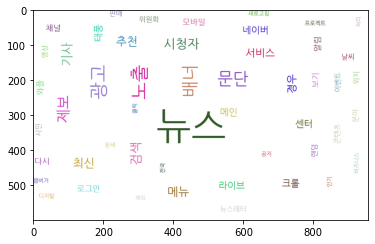

In [152]:
img = mpimg.imread("word_ytn.png")
plt.imshow(img)
plt.show()

## Test 1차

캐글 타이타닉 파일 다운로드 링크 https://www.kaggle.com/c/titanic/data

In [313]:
import numpy as np
import pandas as pd
import seaborn as sns

import math
import matplotlib.pyplot as plt
%matplotlib inline

import warnings ; warnings.filterwarnings('ignore')

1. 다운 받은 train 데이터를 아래와 같이 불러오고 index를 PassengerId로 변경하세요.
![문제1](문제1.jpg)

In [317]:
# code를 작성하세요.
train=pd.read_csv('train.csv')
train.set_index('PassengerId', inplace=True)
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


2. 다운 받은 test 데이터를 아래와 같이 불러오고 index를 PassengerId로 변경하세요.
![문제2](문제2.jpg)

In [318]:
# code를 작성하세요.
test=pd.read_csv('test.csv')
test.set_index('PassengerId', inplace=True)
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


3. train 데이터를 활용해 아래와 같은 dataframe을 도출해보세요. Survived는 생존자는 1, 사망자는 0 입니다. 따라서 Survived의 mean값은
   생존율로 볼 수 있습니다.
![문제3](문제3.jpg)

In [319]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [320]:
# code를 작성하세요.
train[['Survived', 'Pclass', 'Age', 'SibSp',
                  'Parch', 'Ticket', 'Fare']].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


4. countplot을 사용하여 아래와 같은 그래프를 도출해보세요. Pclass의 1은 1등석, 2는 2등석, 3은 3등석입니다. 보시는대로 1등석이 다른 등석
   보다 높은 생존율을 보입니다. y축의 count는 총 수기 때문에 Pclass 별 총 생존수와 총 사망자수로 볼 수 있습니다.
![문제4](문제4.jpg)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

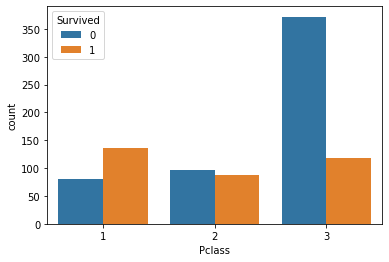

In [321]:
# code를 작성하세요.
sns.countplot(data=train, x='Pclass', hue='Survived')

5. pivot table을 사용하여 아래와 같은 dataframe을 만들어보세요. C,Q,S는 타이타닉이 경유한 항구의 앞글자이며 승객들은 해당되는 항구에서 
   타이타닉을 탔습니다. C항구에서 탄 사람들이 높은 생존율을 보입니다.
![문제5](문제5.jpg)

In [322]:
# code를 작성하세요.
index = ['Embarked']
values = ['Survived']
pd.pivot_table(train, index=index, values=values)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


6. Countplot을 활용하여 아래 그래프를 도출해보세요.
![문제6](문제6.jpg)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

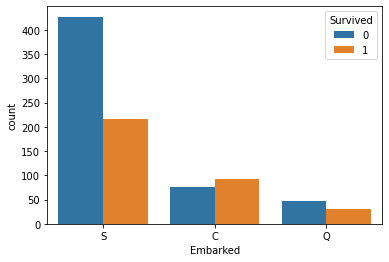

In [323]:
# code를 작성하세요.
sns.countplot(data=train, x='Embarked', hue='Survived')

7. groupby를 사용하여 아래와 같은 Series를 만들어보세요.
![문제7](문제7.jpg)

In [324]:
# code를 작성하세요.
index = ['Pclass']
train.groupby(index)['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

8. AgeType이라는 컬럼을 만들어 봅시다. 15세 미만은 young, 15세 이상 30세 미만은 middle, 30세 이상은 old로 정합니다.
   아래와 같은 dataframe을 도출해보세요.
![문제8](문제8.jpg)

In [325]:
# code를 작성하세요.
train['AgeType'] = np.nan
train.loc[train['Age']<15, 'AgeType']='young'
train.loc[((train['Age']>=15)&(train['Age']<30)), 'AgeType']='middle'
train.loc[train['Age']>=30, 'AgeType']='old'
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeType
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,middle
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,old
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,middle
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,old
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,old
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,middle
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,middle
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN


9. 아래와 같은 그래프를 도출해보세요.
![문제9](문제9.jpg)

<AxesSubplot:xlabel='AgeType', ylabel='count'>

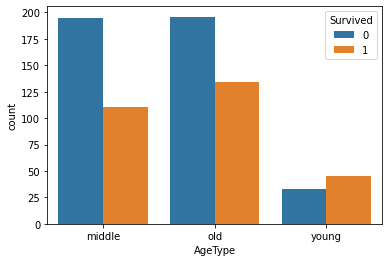

In [326]:
# code를 작성하세요.
sns.countplot(data=train, x='AgeType', hue='Survived')

10. 나이를 모르는 사람과 나이가 알려진 사람을 구별하는 컬럼을 만들어 봅시다. Age에 나이가 입력되지 않은 조건은 isnull()과 notnull()을 
    사용하여 보다 편하게 전처리할 수 있습니다. 아래와 같은 dataframe을 도출해보세요.
![문제10](문제10.jpg)

In [327]:
# code를 작성하세요.
AgeInfo = np.nan
train.loc[train['Age'].isnull(), 'AgeInfo']='unknown'
train.loc[train['Age'].notnull(), 'AgeInfo']='known'
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeType,AgeInfo
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,middle,known
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,old,known
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,middle,known
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,old,known
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,old,known
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,middle,known
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,middle,known
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,unknown


11. 아래와 같은 그래프를 도출해보세요. 나이가 기록된 사람들의 생존율이 높은 것을 알 수 있습니다.
![문제11](문제11.jpg)

<AxesSubplot:xlabel='AgeInfo', ylabel='count'>

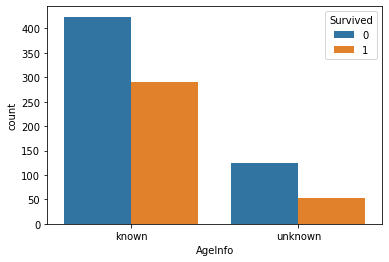

In [328]:
# code를 작성하세요.
sns.countplot(data=train, x='AgeInfo', hue='Survived')

12. Pclass 별 평균 나이의 dataframe을 구해보세요.
![문제12](문제12.jpg)

In [329]:
# code를 작성하세요.
index = ['Pclass']
values = ['Age']
pd.pivot_table(train, index=index, values=values)

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


13. Age(All) 컬럼을 만들어 보겠습니다. 나이가 기록된 사람은 같은 나이를 입력하시고 나이가 기록 안된 사람은 Pclass 별 평균 나이를
    입력해 봅시다. 아래와 같은 dataframe을 도출해보세요.
![문제13](문제13.jpg)

In [335]:
# code를 작성하세요.
train.round({'Age(All)': 5})
train['Age(All)'] = train['Age']
train.loc[((train['Age'].isnull())&(train['Pclass']==1)), 'Age(All)']='38.233441'
train.loc[((train['Age'].isnull())&(train['Pclass']==2)), 'Age(All)']='29.877630'
train.loc[((train['Age'].isnull())&(train['Pclass']==3)), 'Age(All)']='25.140620'
train['Age(All)'] = train['Age(All)'].astype('float64')
train.round({'Age(All)': 5})

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeType,AgeInfo,Age(All)
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,middle,known,22.00000
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,old,known,38.00000
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,middle,known,26.00000
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,old,known,35.00000
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,old,known,35.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,middle,known,27.00000
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,middle,known,19.00000
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,unknown,25.14062


14. 타이타닉 승객 중 혼자 탄 사람을 나타내는 single 컬럼을 만들어 봅시다. SibSp는 배우자와 자녀의 총 수를 나타내며 Parch는 부모의 수를 
    뜻합니다. SibSp와 Parch가 모두 0인 사람이 타이타닉에 혼자 승선한 승객입니다. 혼자 승선했을 경우 1이라 입력하고 아닐 경우 0으로
    입력합시다. 아래와 같은 dataframe을 도출해 보세요.
    
![문제14](문제14.jpg)

In [336]:
# code를 작성하세요.
train['Single'] = float(0)
train.loc[((train['SibSp']==0)&(train['Parch']==0)), 'Single']= 1
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeType,AgeInfo,Age(All),Single
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,middle,known,22.00000,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,old,known,38.00000,0.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,middle,known,26.00000,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,old,known,35.00000,0.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,old,known,35.00000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,middle,known,27.00000,1.0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,middle,known,19.00000,1.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,unknown,25.14062,0.0


15. 아래와 같은 그래프를 도출해보세요. 혼자 승선한 승객의 사망율이 높은 것을 알 수 있습니다.
![문제15](문제15.jpg)

<AxesSubplot:xlabel='Single', ylabel='count'>

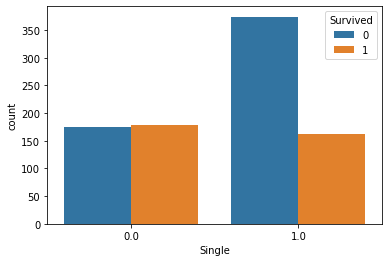

In [337]:
# code를 작성하세요.
sns.countplot(data=train, x='Single', hue='Survived')

16. SibSp와 Parch을 합친 총 가족수 컬럼을 만들어 봅시다. 컬럼 이름은 Family로 하겠습니다. SibSp + Parch + 1을 하여 승객 본인도 포함시켜
    총 수를 입력합시다. pivot table을 활용하여 아래와 같은 dataframe을 도출해보세요.
![문제16](문제16.jpg)

In [338]:
# code를 작성하세요.
train['Family'] = train['SibSp'] + train['Parch'] + 1

index = ['Family']
values = ['Survived']
pd.pivot_table(train, index=index, values=values)

,Survived
Family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


17. 아래와 같은 그래프를 도출해보세요. family 수는 2~4 사이일 때 가장 생존율이 높은 것으로 보입니다.
![문제17](문제17.jpg)

<AxesSubplot:xlabel='Family', ylabel='count'>

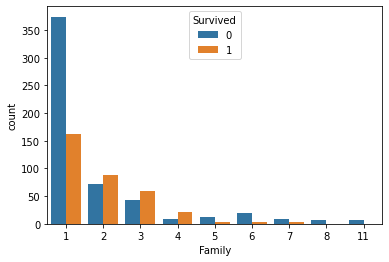

In [339]:
# code를 작성하세요.
sns.countplot(data=train, x='Family', hue='Survived')

18. Family 컬럼을 참고하여 수자의 크기에 따라 single, small, big으로 분류하는 FamilySize 컬럼을 만들어 봅시다. Family가 1일 때는 single,
    1보다 크고 5보다 작을 땐 small, 5이상일 땐 big을 입력합니다. pivot table을 활용하여 아래 dataframe을 도출해 보세요.
![문제18](문제18.jpg)

In [340]:
# code를 작성하세요.
train['FamilySize'] = np.nan
train.loc[train['Family']==1, 'FamilySize']= 'single'
train.loc[((train['Family']>1)&(train['Parch']<5)), 'FamilySize']= 'small'
train.loc[train['Family']>=5, 'FamilySize']= 'big'
index = ['FamilySize']
values = ['Survived']
pd.pivot_table(train, index=index, values=values)

,Survived
FamilySize,
big,0.161290
single,0.303538
small,0.578767


19. 아래와 같은 그래프를 도출해보세요.
![문제19](문제19.jpg)

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

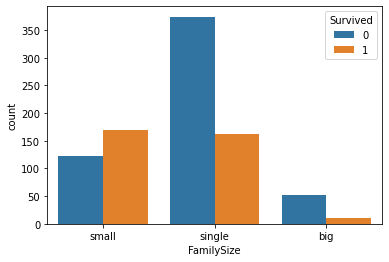

In [341]:
# code를 작성하세요.
sns.countplot(data=train, x='FamilySize', hue='Survived')

20. pivot table을 활용하여 아래와 같은 dataframe을 만들어 보세요. 여성이 매우 높은 생존율을 보이는 걸 알 수 있습니다.
![문제20](문제20.jpg)

In [342]:
# code를 작성하세요.
index = ['Sex']
values = ['Survived']
pd.pivot_table(train, index=index, values=values)

,Survived
Sex,
female,0.742038
male,0.188908


21. 아래와 같은 그래프를 도출해보세요.
![문제21](문제21.jpg)

<AxesSubplot:xlabel='Sex', ylabel='count'>

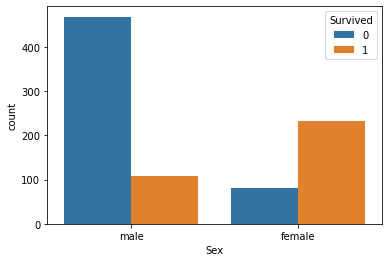

In [343]:
# code를 작성하세요.
sns.countplot(data=train, x='Sex', hue='Survived')

22. Sex 컬럼의 male과 female은 머신러닝 학습 데이터로는 적합하지 않습니다. 적합하도록 새로운 Sex_number라는 새로운 컬럼을 만들어 봅시다.
    male은 0, female은 1로 입력합시다. 아래와 같은 dataframe을 도출해 보세요.
![문제22](문제22.jpg)

In [345]:
# code를 작성하세요.
train['Sex_number'] = (train['Sex']=='male').astype(float)
train['Sex_number'] = (train['Sex']=='female').astype(float)
train[['Sex', 'Sex_number']]

,Sex,Sex_number
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0
...,...,...
887,male,0.0
888,female,1.0
889,female,1.0


23. 남성과 여성의 생존율 차이가 극명합니다. 좀더 디테일하게 확인해 봅시다. Titles 컬럼을 만들어 Mr, Miss, Mrs, Master로 분류해 봅시다.
    Master는 당시에 결혼하지 않은 남성에게 붙이는 호칭이었습니다. .str.contains을 사용하면 문자열에서 특정 문자열이 포함 유무를 확인
    할 수 있으니 사용하여 새로운 컬럼을 만들어 봅시다. 아래와 같은 dataframe을 도출해 보세요.
![문제23](문제23.jpg)

In [346]:
# code를 작성하세요. tips[tips['sex'].str.contains('ma')]
train['Titles'] = np.nan
train.loc[train['Name'].str.contains('Mr'), 'Titles']= 'Mr'
train.loc[train['Name'].str.contains('Miss'), 'Titles']= 'Miss'
train.loc[train['Name'].str.contains('Mrs'), 'Titles']= 'Mrs'
train.loc[train['Name'].str.contains('Master'), 'Titles']= 'Master'
train[['Name', 'Titles']]

,Name,Titles
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr
...,...,...
887,"Montvila, Rev. Juozas",NaN
888,"Graham, Miss. Margaret Edith",Miss
889,"Johnston, Miss. Catherine Helen ""Carrie""",Miss


24. 아래와 같은 그래프를 작성해보세요. 남성 중에선 Mr보다 Master의 생존율이 높게 나옵니다. 
![문제24](문제24.jpg)

<AxesSubplot:xlabel='Titles', ylabel='count'>

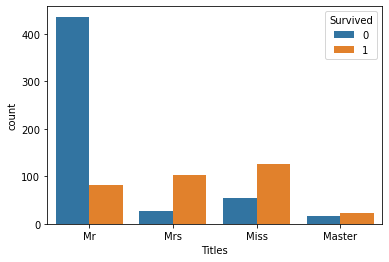

In [348]:
# code를 작성하세요.
sns.countplot(data=train, x='Titles', hue='Survived')

## 수고하셨습니다!